In [81]:
import pandas as pd
import re

df = pd.read_csv('reku_selected_column_review_mentah.csv')
df.head()


,content,score
0,apk bagus,5
1,"Lucu asli, kalo buka realtime trx harganya Rp....",1
2,aplikasi REKU adalah dompet yang sama juga mut...,5
3,ok,5
4,"tambah mahal,, jarak jual dan belinya terlalu ...",3


In [82]:
df.shape

(10201, 2)

# Casefolding

In [83]:
# Kalau mau hapus data pakai drop
#df_drop = df.drop('score', axis=1)

#df_drop

In [84]:
import string

def preprocess_text(kalimat):
    # Merubah kalimat menjadi lowercase
    lower_case = kalimat.lower()

    # Menghapus angka dari kalimat
    hasil = re.sub(r"\d+", "", lower_case)

    # Menghapus tanda baca dari kalimat
    hasil = hasil.translate(str.maketrans("","",string.punctuation))

    # Menghapus spasi pada awal dan akhir kalimat
    hasil = hasil.strip()

    return hasil

df['clean_text'] = df['content'].apply(preprocess_text)
df.head()

,content,score,clean_text
0,apk bagus,5,apk bagus
1,"Lucu asli, kalo buka realtime trx harganya Rp....",1,lucu asli kalo buka realtime trx harganya rp s...
2,aplikasi REKU adalah dompet yang sama juga mut...,5,aplikasi reku adalah dompet yang sama juga mut...
3,ok,5,ok
4,"tambah mahal,, jarak jual dan belinya terlalu ...",3,tambah mahal jarak jual dan belinya terlalu ge...


# Tokenizing

In [85]:
import nltk
from nltk.tokenize import word_tokenize

#nltk.download('all') #untuk download semua data nltk
nltk.download('punkt') #untuk tokenisasi
nltk.download('punkt_tab') #untuk tokenisasi
#nltk.download('stopwords') #untuk stopword


[nltk_data] Downloading package punkt to /home/anfiniti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/anfiniti/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [86]:
def tokenisasi(kalimat):
    tokens = word_tokenize(kalimat)
    return tokens

In [87]:
df['token'] = df['clean_text'].apply(tokenisasi)
df.head()

,content,score,clean_text,token
0,apk bagus,5,apk bagus,"[apk, bagus]"
1,"Lucu asli, kalo buka realtime trx harganya Rp....",1,lucu asli kalo buka realtime trx harganya rp s...,"[lucu, asli, kalo, buka, realtime, trx, hargan..."
2,aplikasi REKU adalah dompet yang sama juga mut...,5,aplikasi reku adalah dompet yang sama juga mut...,"[aplikasi, reku, adalah, dompet, yang, sama, j..."
3,ok,5,ok,[ok]
4,"tambah mahal,, jarak jual dan belinya terlalu ...",3,tambah mahal jarak jual dan belinya terlalu ge...,"[tambah, mahal, jarak, jual, dan, belinya, ter..."


# Filtering (Stopword Removal)

In [88]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopword = factory.get_stop_words()
print(stopword)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [89]:
def stop_word_removal(tokens):
    cleaned_tokens = []
    for token in tokens:
        if token not in stopword:
            cleaned_tokens.append(token)
    return cleaned_tokens

In [90]:
df['stopword_removal'] = df['token'].apply(stop_word_removal)
df.head()

,content,score,clean_text,token,stopword_removal
0,apk bagus,5,apk bagus,"[apk, bagus]","[apk, bagus]"
1,"Lucu asli, kalo buka realtime trx harganya Rp....",1,lucu asli kalo buka realtime trx harganya rp s...,"[lucu, asli, kalo, buka, realtime, trx, hargan...","[lucu, asli, kalo, buka, realtime, trx, hargan..."
2,aplikasi REKU adalah dompet yang sama juga mut...,5,aplikasi reku adalah dompet yang sama juga mut...,"[aplikasi, reku, adalah, dompet, yang, sama, j...","[aplikasi, reku, dompet, sama, mutu, nya, domp..."
3,ok,5,ok,[ok],[]
4,"tambah mahal,, jarak jual dan belinya terlalu ...",3,tambah mahal jarak jual dan belinya terlalu ge...,"[tambah, mahal, jarak, jual, dan, belinya, ter...","[tambah, mahal, jarak, jual, belinya, terlalu,..."


# Stemming

In [91]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

In [92]:
def stemming_text(tokens):
    hasil = [stemmer.stem(token) for token in tokens]
    return hasil

In [93]:
df['stemming'] = df['stopword_removal'].apply(stemming_text)
df.head()

,content,score,clean_text,token,stopword_removal,stemming
0,apk bagus,5,apk bagus,"[apk, bagus]","[apk, bagus]","[apk, bagus]"
1,"Lucu asli, kalo buka realtime trx harganya Rp....",1,lucu asli kalo buka realtime trx harganya rp s...,"[lucu, asli, kalo, buka, realtime, trx, hargan...","[lucu, asli, kalo, buka, realtime, trx, hargan...","[lucu, asli, kalo, buka, realtime, trx, harga,..."
2,aplikasi REKU adalah dompet yang sama juga mut...,5,aplikasi reku adalah dompet yang sama juga mut...,"[aplikasi, reku, adalah, dompet, yang, sama, j...","[aplikasi, reku, dompet, sama, mutu, nya, domp...","[aplikasi, reku, dompet, sama, mutu, nya, domp..."
3,ok,5,ok,[ok],[],[]
4,"tambah mahal,, jarak jual dan belinya terlalu ...",3,tambah mahal jarak jual dan belinya terlalu ge...,"[tambah, mahal, jarak, jual, dan, belinya, ter...","[tambah, mahal, jarak, jual, belinya, terlalu,...","[tambah, mahal, jarak, jual, beli, terlalu, ge..."


In [94]:
print(df['stemming'])

0                                             [apk, bagus]
1        [lucu, asli, kalo, buka, realtime, trx, harga,...
2        [aplikasi, reku, dompet, sama, mutu, nya, domp...
3                                                       []
4        [tambah, mahal, jarak, jual, beli, terlalu, ge...
                               ...                        
10196    [dulu, bos, koin, market, lengkap, baru, fulls...
10197                                                   []
10198                                           [oke, gan]
10199                                                [bgt]
10200                                          [mntap, ni]
Name: stemming, Length: 10201, dtype: object


# Viz

In [95]:
from nltk.probability import FreqDist

In [96]:
import matplotlib.pyplot as plt

In [97]:
all_tokens = [token for tokens in df['stemming'] for token in tokens]
fdist = FreqDist(all_tokens)
print(fdist.most_common())

[('aplikasi', 2649), ('sangat', 1954), ('mudah', 1693), ('bagus', 1475), ('rekening', 1452), ('nya', 1411), ('yg', 1123), ('reku', 1061), ('beli', 945), ('baik', 941), ('guna', 867), ('jual', 809), ('mantap', 809), ('crypto', 801), ('cepat', 723), ('banyak', 713), ('buat', 682), ('', 640), ('deposit', 638), ('lebih', 626), ('gak', 608), ('mau', 591), ('koin', 568), ('mula', 561), ('jadi', 556), ('transaksi', 512), ('moga', 508), ('aman', 507), ('fitur', 504), ('lama', 497), ('banget', 497), ('kriptoamandireku', 496), ('coin', 491), ('tambah', 462), ('ga', 461), ('harga', 460), ('apk', 459), ('baru', 456), ('good', 452), ('investasi', 449), ('terus', 414), ('paham', 397), ('aja', 393), ('masuk', 384), ('bantu', 370), ('wd', 368), ('trading', 367), ('kasih', 367), ('makin', 366), ('bintang', 357), ('sekali', 348), ('verifikasi', 341), ('biaya', 327), ('selalu', 310), ('naik', 307), ('fee', 305), ('udah', 304), ('pakai', 301), ('withdraw', 283), ('sama', 276), ('suka', 275), ('murah', 269

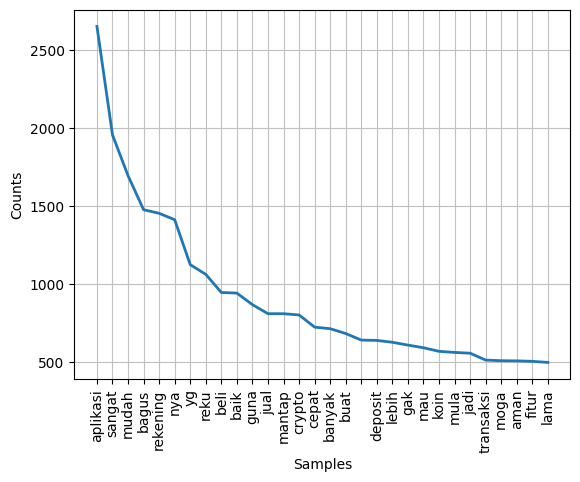

In [98]:
fdist.plot(30, cumulative=False)
plt.show()

# Simpan dataset bersih

In [99]:
df.to_csv('reku_clean2.csv', index=False)

In [100]:
data = pd.read_csv('reku_clean2.csv')
data.head(20)

,content,score,clean_text,token,stopword_removal,stemming
0,apk bagus,5,apk bagus,"['apk', 'bagus']","['apk', 'bagus']","['apk', 'bagus']"
1,"Lucu asli, kalo buka realtime trx harganya Rp....",1,lucu asli kalo buka realtime trx harganya rp s...,"['lucu', 'asli', 'kalo', 'buka', 'realtime', '...","['lucu', 'asli', 'kalo', 'buka', 'realtime', '...","['lucu', 'asli', 'kalo', 'buka', 'realtime', '..."
2,aplikasi REKU adalah dompet yang sama juga mut...,5,aplikasi reku adalah dompet yang sama juga mut...,"['aplikasi', 'reku', 'adalah', 'dompet', 'yang...","['aplikasi', 'reku', 'dompet', 'sama', 'mutu',...","['aplikasi', 'reku', 'dompet', 'sama', 'mutu',..."
3,ok,5,ok,['ok'],[],[]
4,"tambah mahal,, jarak jual dan belinya terlalu ...",3,tambah mahal jarak jual dan belinya terlalu ge...,"['tambah', 'mahal', 'jarak', 'jual', 'dan', 'b...","['tambah', 'mahal', 'jarak', 'jual', 'belinya'...","['tambah', 'mahal', 'jarak', 'jual', 'beli', '..."
5,"Aplikasi ini bagus untuk berdagang kripto, tam...",5,aplikasi ini bagus untuk berdagang kripto tamp...,"['aplikasi', 'ini', 'bagus', 'untuk', 'berdaga...","['aplikasi', 'bagus', 'berdagang', 'kripto', '...","['aplikasi', 'bagus', 'dagang', 'kripto', 'tam..."
6,baru mau coba muda mudahan apk nya bagus,5,baru mau coba muda mudahan apk nya bagus,"['baru', 'mau', 'coba', 'muda', 'mudahan', 'ap...","['baru', 'mau', 'coba', 'muda', 'mudahan', 'ap...","['baru', 'mau', 'coba', 'muda', 'mudah', 'apk'..."
7,udh Joss pokoknya,5,udh joss pokoknya,"['udh', 'joss', 'pokoknya']","['udh', 'joss', 'pokoknya']","['udh', 'joss', 'pokok']"
8,"Exchange lokal paling mantap, admin ga ribe te...",5,exchange lokal paling mantap admin ga ribe ter...,"['exchange', 'lokal', 'paling', 'mantap', 'adm...","['exchange', 'lokal', 'paling', 'mantap', 'adm...","['exchange', 'lokal', 'paling', 'mantap', 'adm..."
9,Sekuritas paraah mines 5 persen abis itu naik ...,1,sekuritas paraah mines persen abis itu naik ...,"['sekuritas', 'paraah', 'mines', 'persen', 'ab...","['sekuritas', 'paraah', 'mines', 'persen', 'ab...","['sekuritas', 'paraah', 'mes', 'persen', 'abis..."
